In [1]:
import numpy
import matplotlib.pyplot as plt
import cv2

In [2]:
def RGB2LAB(array):

    MAT1 = numpy.float32([[0.3811, 0.5783, 0.0402], [0.1967, 0.7244, 0.0782], [0.0241, 0.1288, 0.8444]])
    
    MAT2 = numpy.float32([[1., 1., 1.], [1., 1., -2.], [1., -1., 0.]])
    
    MAT3 = numpy.float32([[1./numpy.sqrt(3.), 0., 0.], [0., 1./numpy.sqrt(6.), 0.], [0., 0., 1./numpy.sqrt(2.)]])
    

    rgb = numpy.float32(array).reshape(-1, 3).T

    lms = numpy.matmul(MAT1, rgb)

    lms = numpy.log10(lms)

    convert_lab = numpy.matmul(MAT3, numpy.matmul(MAT2, lms))

    convert_lab = convert_lab.T.reshape(array.shape[0], array.shape[1], 3)
    
    return convert_lab

In [3]:
def c_transfer(s_img, d_img,R=True):

    d_1 = RGB2LAB(d_img)
    s_1 = RGB2LAB(s_img)
    
    d_2 = numpy.float32(d_1)
    d_2 = d_2.reshape(-1, 3)
    d_2 = d_2.T
    mu_d = numpy.mean(d_2, axis=1)
    sigma_d = numpy.std(d_2, axis=1)

    s_2 = numpy.float32(s_1)
    s_2 = s_2.reshape(-1, 3)
    s_2 = s_2.T
    mu_s = numpy.mean(s_2, axis=1)
    sigma_s = numpy.std(s_2, axis=1)

    d_1 = d_1 - mu_d

    d_1 = d_1 * (sigma_d / sigma_s )

    d_1 = d_1 + mu_s

    MAT1 = numpy.float32([[1./numpy.sqrt(3.), 0., 0.],[0., 1./numpy.sqrt(6.), 0.],[0., 0., 1./numpy.sqrt(2.)]])
    
    MAT2 = numpy.float32([[1., 1., 1.],[1., 1., -1.],[1., -2., 0.]])
    
    MAT3 = numpy.float32([[4.4679, -3.5873, 0.1193],[-1.2186, 2.3809, -0.1624],[0.0497, -0.2439, 1.2045]])

    lab = numpy.float32(d_1)
    lab = lab.reshape(-1,3)
    lab = lab.T
    lms = numpy.matmul(MAT2, numpy.matmul(MAT1, lab))
    lms = numpy.power(lms, 10)
    convert_rgb = numpy.matmul(MAT3, lms)
    image_rgb = convert_rgb.T
    image_rgb = image_rgb.reshape(d_1.shape[0], d_1.shape[1], 3)
    
    if R:
        image_rgb = numpy.uint8(re_scaling(image_rgb))
    else:
        image_rgb = numpy.uint8(image_rgb)
    image_rgb = plt.imshow(image_rgb)
    plt.title("Result Image")    
    return image_rgb

In [4]:
def re_scaling(i):
    i = numpy.float32(i)
    i =  (i - i.min()) / (i.max() - i.min())
    i = 255. * i
    return i

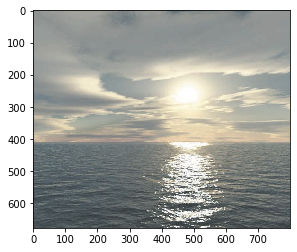

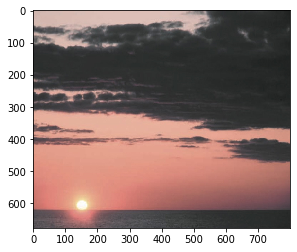

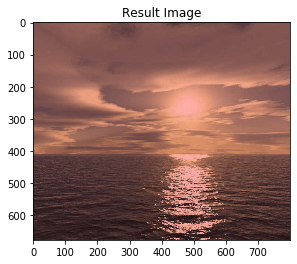

In [5]:
destination = plt.imread("./color1.jpg")
plt.imshow(destination)
plt.show()

source=plt.imread("./color2.jpg")
plt.imshow(source)
plt.show()

image =c_transfer(source,destination,R=True)